In [1]:
import pandas as pd
import numpy as np
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
sys.path.append(os.path.join(os.path.pardir))
from evaluate import Evaluator

In [25]:
lb_names = ['9p', '7p', '5p', '3p', '1p']
lbs = []
lbs += [[1] * 9 + [0] * 1]
lbs += [[1] * 7 + [0] * 3]
lbs += [[1] * 5 + [0] * 5]
lbs += [[1] * 3 + [0] * 7]
lbs += [[1] * 1 + [0] * 9]
conf = [0.99, 0.8, 0.5, 0.2, 0]
pred = np.array([1 - 0.1 * i for i in range(10)])
print(pred)

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [26]:
evaluator = Evaluator("classification")
for lb in lbs:
    for c in conf:
        evaluator.log(lb, pred, c)
df = evaluator.to_dataframe()
df["labels"] = [lb for lb in lb_names for _ in range(len(conf))]
df["conf"] = [c for c in conf for _ in range(len(lbs))]
df

/Users/niche/projects/modeling-guide/visualization/../evaluate.py:232: RuntimeWarning: invalid value encountered in scalar divide
  return num / den


,iteration,accuracy,precision,recall,f1,f2,f05,mcc,labels,conf
0,0,0.2,1.000,0.111111,0.200000,0.135135,0.384615,0.111111,9p,0.99
1,1,0.3,1.000,0.222222,0.363636,0.263158,0.588235,0.166667,9p,0.99
2,2,0.6,1.000,0.555556,0.714286,0.609756,0.862069,0.333333,9p,0.99
3,3,0.9,1.000,0.888889,0.941176,0.909091,0.975610,0.666667,9p,0.99
4,4,0.9,0.900,1.000000,0.947368,0.978261,0.918367,NaN,9p,0.99
5,5,0.4,1.000,0.142857,0.250000,0.172414,0.454545,0.218218,7p,0.80
6,6,0.5,1.000,0.285714,0.444444,0.333333,0.666667,0.327327,7p,0.80
7,7,0.8,1.000,0.714286,0.833333,0.757576,0.925926,0.654654,7p,0.80
8,8,0.9,0.875,1.000000,0.933333,0.972222,0.897436,0.763763,7p,0.80
9,9,0.7,0.700,1.000000,0.823529,0.921053,0.744681,NaN,7p,0.80


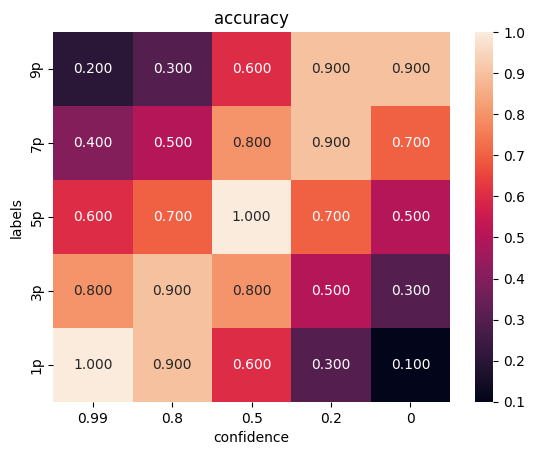

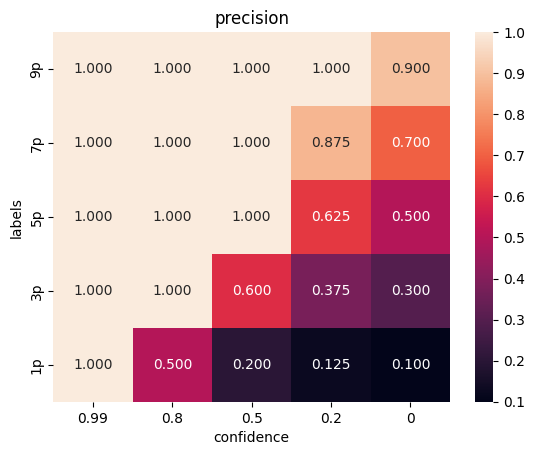

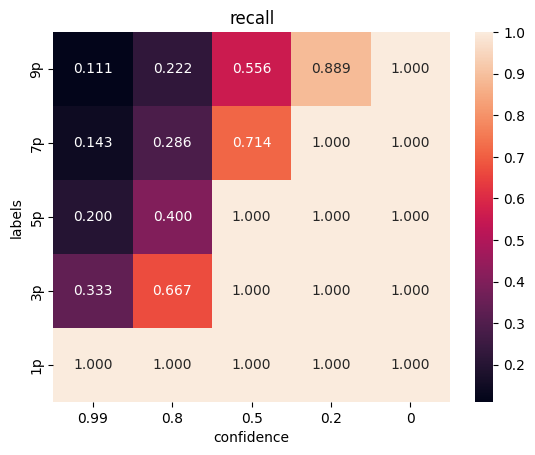

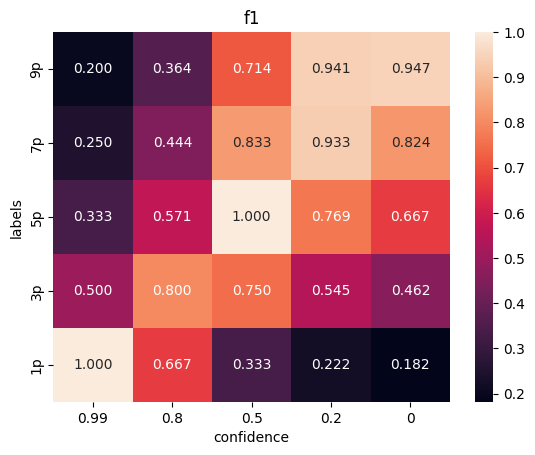

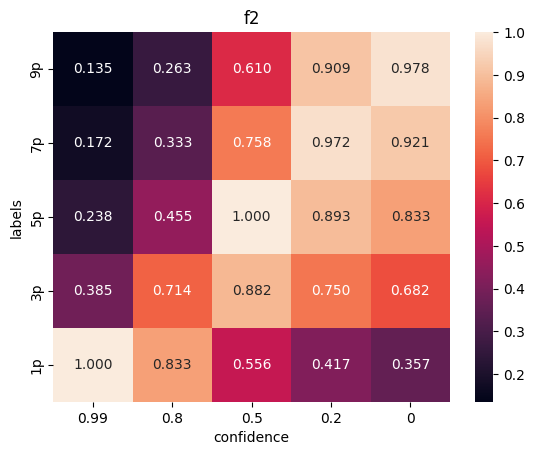

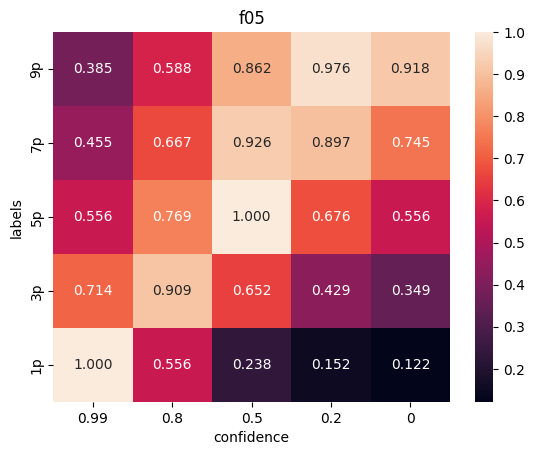

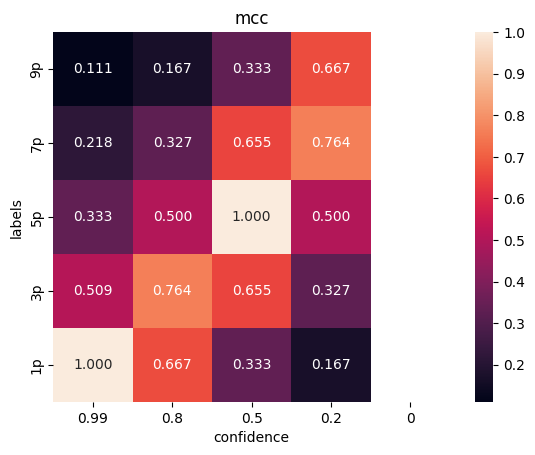

In [29]:
# plot 3x3 heatmap for each column
i = 1
for i in [1, 2, 3, 4, 5, 6, 7, ]:
    title = df.columns[i]
    sns.heatmap(df.iloc[:, i].values.reshape(len(lbs), len(conf)), annot=True, 
                fmt=".3f", xticklabels=conf, yticklabels=lb_names)
    plt.title(title)
    plt.xlabel("confidence")
    plt.ylabel("labels")
    plt.show()